# The Big Bad Bully

In [49]:
# https://www.geeksforgeeks.org/dsa/bully-algorithm-in-distributed-system/

from typing import List, Optional


class Node:
    counter = 0
    def __init__(self, node_id: int, largest_id: int):
        self.id = node_id
        self.is_coordinator = False
        self.has_announced = False
        self.has_elected = False
        self.largest_id = largest_id
        self.cluster: Optional[List["Node"]] = None

    def set_cluster(self, nodes: List["Node"]) -> None:
        self.cluster = nodes
    
    def get_id(self) -> int:
        return self.id

    def initiate_election(self) -> None:
        print(f"Node {self.id} initiates election.")
        assert self.cluster is not None, "Cluster not set"

        got_response = False
        # Ask all higher-ID nodes
        for node in self.cluster:
            if node.id > self.id and not self.has_elected:
                if node.receive_election_message(self):
                    got_response = True
                if node.get_id() == self.largest_id:
                    self.has_elected = True

        # If nobody higher responded, I win
        if not got_response and not self.has_announced and not self.has_elected:
            self.become_coordinator()
            self.announce_coordinator()
            self.has_announced = True
        # Else: do nothing; a higher node will continue and eventually announce

    def receive_election_message(self, sender: "Node") -> bool:
        print(f"Node {self.id} receives election message from Node {sender.id}")
        Node.counter += 1
        print(f"Counter: {Node.counter}")
        if self.id > sender.id:
            print(f"Node {self.id} responds to Node {sender.id}")
            sender.receive_response(self)
            # Per bully: a higher node that responded now runs its own election
            self.initiate_election()
            return True
        return False

    def receive_response(self, sender: "Node") -> None:
        print(f"Node {self.id} receives response from Node {sender.id}")
        Node.counter += 1
        print(f"Counter: {Node.counter}")

    def become_coordinator(self) -> None:
        print(f"Node {self.id} becomes the coordinator.")
        self.is_coordinator = True

    def set_coordinator(self, coordinator: "Node") -> None:
        print(f"Node {self.id} acknowledges Node {coordinator.id} as coordinator.")
        Node.counter += 1
        print(f"Counter: {Node.counter}")

    def announce_coordinator(self) -> None:
        assert self.cluster is not None
        for node in self.cluster:
            node.is_coordinator = False
        self.is_coordinator = True
        # (Optional) notify others
        for node in self.cluster:
            if node.id != self.id:
                node.set_coordinator(self)

# --- Demo ---
if __name__ == "__main__":
    largest_id = 100  # Assuming IDs are 1 to 5
    nodes = [Node(i, largest_id) for i in range(1, largest_id + 1)]
    for n in nodes:
        n.set_cluster(nodes)

    # Simulate: Node 3 detects failure and starts election
    nodes[0].initiate_election()  # Node with id=3
    print(Node.counter)


Node 1 initiates election.
Node 2 receives election message from Node 1
Counter: 1
Node 2 responds to Node 1
Node 1 receives response from Node 2
Counter: 2
Node 2 initiates election.
Node 3 receives election message from Node 2
Counter: 3
Node 3 responds to Node 2
Node 2 receives response from Node 3
Counter: 4
Node 3 initiates election.
Node 4 receives election message from Node 3
Counter: 5
Node 4 responds to Node 3
Node 3 receives response from Node 4
Counter: 6
Node 4 initiates election.
Node 5 receives election message from Node 4
Counter: 7
Node 5 responds to Node 4
Node 4 receives response from Node 5
Counter: 8
Node 5 initiates election.
Node 6 receives election message from Node 5
Counter: 9
Node 6 responds to Node 5
Node 5 receives response from Node 6
Counter: 10
Node 6 initiates election.
Node 7 receives election message from Node 6
Counter: 11
Node 7 responds to Node 6
Node 6 receives response from Node 7
Counter: 12
Node 7 initiates election.
Node 8 receives election mes

# The Big good Bully

In [50]:
# https://www.geeksforgeeks.org/dsa/bully-algorithm-in-distributed-system/

from typing import List, Optional


class Node:
    counter = 0
    def __init__(self, node_id: int):
        self.id = node_id
        self.is_coordinator = False
        self.has_coordinator = False
        self.cluster: Optional[List["Node"]] = None

    def set_cluster(self, nodes: List["Node"]) -> None:
        self.cluster = nodes

    def initiate_election(self) -> None:
        print(f"Node {self.id} initiates election.")
        assert self.cluster is not None, "Cluster not set"

        got_response = False
        # Ask all higher-ID nodes
        for node in self.cluster:
            if not self.has_coordinator and node.id > self.id:
                if node.receive_election_message(self):
                    got_response = True

        # If nobody higher responded, I win
        if not got_response:
            self.become_coordinator()
            self.announce_coordinator()
        # Else: do nothing; a higher node will continue and eventually announce

    def receive_election_message(self, sender: "Node") -> bool:
        print(f"Node {self.id} receives election message from Node {sender.id}")
        Node.counter += 1
        print(f"Counter: {Node.counter}")
        if self.id > sender.id:
            print(f"Node {self.id} responds to Node {sender.id}")
            sender.receive_response(self)
            # Per bully: a higher node that responded now runs its own election
            self.initiate_election()
            return True
        return False

    def receive_response(self, sender: "Node") -> None:
        print(f"Node {self.id} receives response from Node {sender.id}")
        Node.counter += 1
        print(f"Counter: {Node.counter}")

    def become_coordinator(self) -> None:
        print(f"Node {self.id} becomes the coordinator.")
        self.is_coordinator = True

    def set_coordinator(self, coordinator: "Node") -> None:
        print(f"Node {self.id} acknowledges Node {coordinator.id} as coordinator.")
        self.has_coordinator = True
        Node.counter += 1
        print(f"Counter: {Node.counter}")

    def announce_coordinator(self) -> None:
        assert self.cluster is not None
        for node in self.cluster:
            node.is_coordinator = False
        self.is_coordinator = True
        # (Optional) notify others
        for node in self.cluster:
            if node.id != self.id:
                node.set_coordinator(self)

# --- Demo ---
if __name__ == "__main__":
    largest_id = 100
    nodes = [Node(i) for i in range(1, largest_id + 1)]
    for n in nodes:
        n.set_cluster(nodes)

    # Simulate: Node 3 detects failure and starts election
    nodes[0].initiate_election()  # Node with id=3
    print(Node.counter)


Node 1 initiates election.
Node 2 receives election message from Node 1
Counter: 1
Node 2 responds to Node 1
Node 1 receives response from Node 2
Counter: 2
Node 2 initiates election.
Node 3 receives election message from Node 2
Counter: 3
Node 3 responds to Node 2
Node 2 receives response from Node 3
Counter: 4
Node 3 initiates election.
Node 4 receives election message from Node 3
Counter: 5
Node 4 responds to Node 3
Node 3 receives response from Node 4
Counter: 6
Node 4 initiates election.
Node 5 receives election message from Node 4
Counter: 7
Node 5 responds to Node 4
Node 4 receives response from Node 5
Counter: 8
Node 5 initiates election.
Node 6 receives election message from Node 5
Counter: 9
Node 6 responds to Node 5
Node 5 receives response from Node 6
Counter: 10
Node 6 initiates election.
Node 7 receives election message from Node 6
Counter: 11
Node 7 responds to Node 6
Node 6 receives response from Node 7
Counter: 12
Node 7 initiates election.
Node 8 receives election mes

In [51]:
import random

# Simulation cell: run both bully variants multiple times and plot message counts

import matplotlib.pyplot as plt

# Use existing largest_id if present; fall back to 100
try:
    n_nodes = largest_id
except NameError:
    n_nodes = 100

class BadNode:
    counter = 0
    def __init__(self, node_id: int, largest_id: int, verbose: bool = False):
        self.id = node_id
        self.is_coordinator = False
        self.has_announced = False
        self.has_elected = False
        self.largest_id = largest_id
        self.cluster = None
        self.verbose = verbose

    def set_cluster(self, nodes):
        self.cluster = nodes

    def initiate_election(self):
        if self.verbose:
            print(f"Node {self.id} initiates election.")
        assert self.cluster is not None
        got_response = False
        for node in self.cluster:
            if node.id > self.id and not self.has_elected:
                if node.receive_election_message(self):
                    got_response = True
                if node.id == self.largest_id:
                    self.has_elected = True
        if not got_response and not self.has_announced and not self.has_elected:
            self.become_coordinator()
            self.announce_coordinator()
            self.has_announced = True

    def receive_election_message(self, sender):
        if self.verbose:
            print(f"Node {self.id} receives election message from Node {sender.id}")
        BadNode.counter += 1
        if self.id > sender.id:
            if self.verbose:
                print(f"Node {self.id} responds to Node {sender.id}")
            sender.receive_response(self)
            self.initiate_election()
            return True
        return False

    def receive_response(self, sender):
        if self.verbose:
            print(f"Node {self.id} receives response from Node {sender.id}")
        BadNode.counter += 1

    def become_coordinator(self):
        if self.verbose:
            print(f"Node {self.id} becomes the coordinator.")
        self.is_coordinator = True

    def set_coordinator(self, coordinator):
        if self.verbose:
            print(f"Node {self.id} acknowledges Node {coordinator.id} as coordinator.")
        BadNode.counter += 1

    def announce_coordinator(self):
        assert self.cluster is not None
        for node in self.cluster:
            node.is_coordinator = False
        self.is_coordinator = True
        for node in self.cluster:
            if node.id != self.id:
                node.set_coordinator(self)


class GoodNode:
    counter = 0
    def __init__(self, node_id: int, verbose: bool = False):
        self.id = node_id
        self.is_coordinator = False
        self.has_coordinator = False
        self.cluster = None
        self.verbose = verbose

    def set_cluster(self, nodes):
        self.cluster = nodes

    def initiate_election(self):
        if self.verbose:
            print(f"Node {self.id} initiates election.")
        assert self.cluster is not None
        got_response = False
        for node in self.cluster:
            if not self.has_coordinator and node.id > self.id:
                if node.receive_election_message(self):
                    got_response = True
        if not got_response:
            self.become_coordinator()
            self.announce_coordinator()

    def receive_election_message(self, sender):
        if self.verbose:
            print(f"Node {self.id} receives election message from Node {sender.id}")
        GoodNode.counter += 1
        if self.id > sender.id:
            if self.verbose:
                print(f"Node {self.id} responds to Node {sender.id}")
            sender.receive_response(self)
            self.initiate_election()
            return True
        return False

    def receive_response(self, sender):
        if self.verbose:
            print(f"Node {self.id} receives response from Node {sender.id}")
        GoodNode.counter += 1

    def become_coordinator(self):
        if self.verbose:
            print(f"Node {self.id} becomes the coordinator.")
        self.is_coordinator = True

    def set_coordinator(self, coordinator):
        if self.verbose:
            print(f"Node {self.id} acknowledges Node {coordinator.id} as coordinator.")
        self.has_coordinator = True
        GoodNode.counter += 1

    def announce_coordinator(self):
        assert self.cluster is not None
        for node in self.cluster:
            node.is_coordinator = False
        self.is_coordinator = True
        for node in self.cluster:
            if node.id != self.id:
                node.set_coordinator(self)


def run_trial(node_class, n_nodes, choose_initiator_random=False):
    # create fresh cluster
    if node_class is BadNode:
        nodes_local = [BadNode(i, n_nodes, verbose=False) for i in range(1, n_nodes + 1)]
        node_class.counter = 0
    else:
        nodes_local = [GoodNode(i, verbose=False) for i in range(1, n_nodes + 1)]
        node_class.counter = 0

    for node in nodes_local:
        node.set_cluster(nodes_local)

    # pick an initiator that is not the highest (so election happens)
    if choose_initiator_random:
        initiator_idx = random.randint(1, n_nodes - 1)  # 1..n-1 (IDs)
    else:
        initiator_idx = 1
    nodes_local[initiator_idx - 1].initiate_election()
    return node_class.counter



Nodes=10:
Bad bully average: 99.0
Good bully average: 27.0
Difference: 72.0
---
Nodes=15:
Bad bully average: 224.0
Good bully average: 42.0
Difference: 182.0
---
Nodes=20:
Bad bully average: 399.0
Good bully average: 57.0
Difference: 342.0
---
Nodes=25:
Bad bully average: 624.0
Good bully average: 72.0
Difference: 552.0
---
Nodes=30:
Bad bully average: 899.0
Good bully average: 87.0
Difference: 812.0
---
Nodes=35:
Bad bully average: 1224.0
Good bully average: 102.0
Difference: 1122.0
---
Nodes=40:
Bad bully average: 1599.0
Good bully average: 117.0
Difference: 1482.0
---


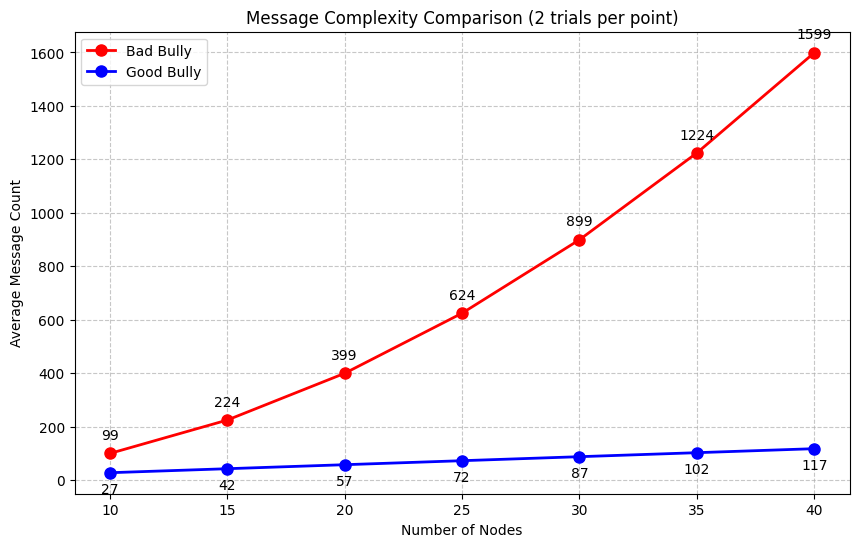

In [52]:
import numpy as np

# Define different node counts to test
node_counts = [10, 15, 20, 25, 30, 35, 40]  # Added 35 and 40
trials = 2  # Number of trials for each node count

# Store results for each node count
bad_averages = []
good_averages = []

# Run trials for each node size
for n_nodes in node_counts:
    bad_counts = []
    good_counts = []
    for _ in range(trials):
        bad_counts.append(run_trial(BadNode, n_nodes))
        good_counts.append(run_trial(GoodNode, n_nodes))
    
    # Calculate averages
    bad_averages.append(sum(bad_counts) / len(bad_counts))
    good_averages.append(sum(good_counts) / len(good_counts))
    print(f"Nodes={n_nodes}:")
    print(f"Bad bully average: {bad_averages[-1]:.1f}")
    print(f"Good bully average: {good_averages[-1]:.1f}")
    print(f"Difference: {bad_averages[-1] - good_averages[-1]:.1f}")
    print("---")

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(node_counts, bad_averages, 'ro-', label='Bad Bully', linewidth=2, markersize=8)
plt.plot(node_counts, good_averages, 'bo-', label='Good Bully', linewidth=2, markersize=8)

# Add labels and title
plt.xlabel("Number of Nodes")
plt.ylabel("Average Message Count")
plt.title(f"Message Complexity Comparison ({trials} trials per point)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels on points
for i, (bad, good) in enumerate(zip(bad_averages, good_averages)):
    plt.annotate(f'{bad:.0f}', (node_counts[i], bad), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{good:.0f}', (node_counts[i], good), textcoords="offset points", xytext=(0,-15), ha='center')

plt.show()